In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
data = pd.read_csv("/Users/SPECTRE/Downloads/archive-3/train.csv")

In [84]:
pd.set_option('display.max_columns', None)
data.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [85]:
data.head()['Inquires - six months']

0    0
1    0
2    0
3    0
4    3
Name: Inquires - six months, dtype: int64

<AxesSubplot:xlabel='Loan Status'>

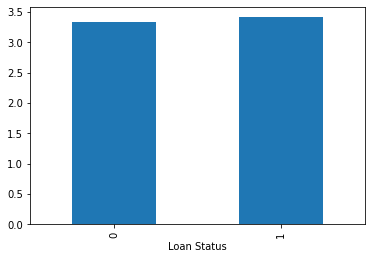

In [86]:
# plot recoveries vs. loan status
data.groupby('Loan Status')['Recoveries'].median().plot(kind='bar')

In [87]:
data.groupby("Loan Status").mean().round(2)

#This shows how similar the statistics of the two classes are. This could be due to 2 reasons - 1. the dataset is highly randomized which makes it unlikely to show correlation.
#2. The classes are imbalanced (less represntation of class 1). 

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
Loan Status,,,,,,,,,,,,,,,,,,,,,,,,,
0,25624430.71,16860.85,15767.05,14622.00,58.18,11.84,80488.08,23.31,0.32,0.15,14.28,0.08,7702.03,52.86,18.63,2067.80,1.13,59.77,1.13,0.02,71.08,0.0,144.59,159137.67,23113.30
1,25658773.35,16731.67,15805.42,14619.87,58.14,11.88,81065.54,23.22,0.35,0.15,14.13,0.09,7673.00,53.18,18.63,2080.68,1.30,58.96,1.08,0.02,71.99,0.0,164.87,163853.53,23218.24


<AxesSubplot:xlabel='Initial List Status'>

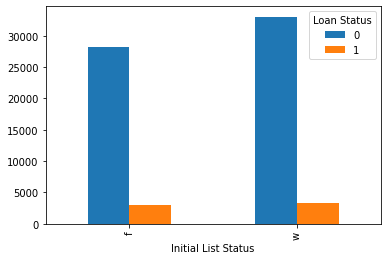

In [88]:
# plot a bar plot of inital list status by the number of 1s and the number of 0s in loan status
data.groupby('Initial List Status')['Loan Status'].value_counts().unstack().plot(kind='bar')

In [89]:
data.groupby("Application Type").sum()["Loan Status"]

Application Type
INDIVIDUAL    6230
JOINT           11
Name: Loan Status, dtype: int64

In [90]:
data.groupby("Verification Status").sum()["Loan Status"]

Verification Status
Not Verified       1506
Source Verified    3085
Verified           1650
Name: Loan Status, dtype: int64

/var/folders/lf/xb0tgmbn1151tv7hrt1mr_5r0000gn/T/ipykernel_32143/2613361430.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Loan Status')['Revolving Balance', 'Revolving Utilities'].median().plot(kind='bar', color=['lightgreen', 'lightblue'])


<AxesSubplot:xlabel='Loan Status'>

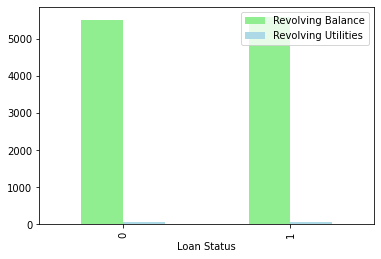

In [91]:
# revolving utilization and revolving balance compared to loan status
data.groupby('Loan Status')['Revolving Balance', 'Revolving Utilities'].median().plot(kind='bar', color=['lightgreen', 'lightblue'])

<AxesSubplot:xlabel='Loan Status'>

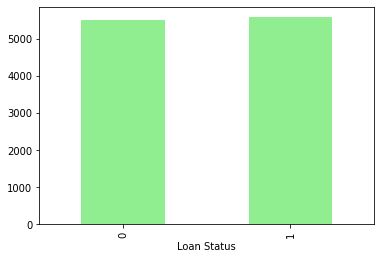

In [92]:
data.groupby('Loan Status')['Revolving Balance'].median().plot(kind='bar', color=['lightgreen'])

<AxesSubplot:xlabel='Loan Status'>

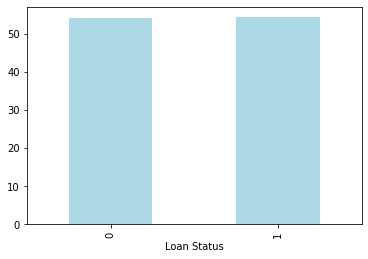

In [93]:
data.groupby('Loan Status')['Revolving Utilities'].median().plot(kind='bar', color=['lightblue'])

<AxesSubplot:xlabel='Loan Status'>

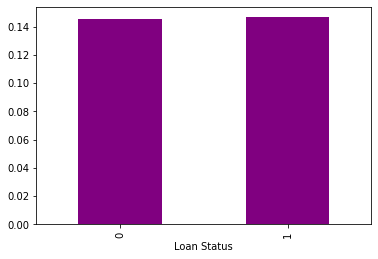

In [94]:
# inquiries 6 months vs loan status
data.groupby('Loan Status')['Inquires - six months'].mean().plot(kind='bar', color = 'purple')

In [95]:
# inquiries 6 mmonth value counts
data['Inquires - six months'].value_counts()

0    60486
1     4558
2     2042
3      320
4       54
5        3
Name: Inquires - six months, dtype: int64

In [96]:
def drop_useless(df):
    df = df.copy()
    df = df.drop(columns=['ID', 'Term', 'Payment Plan', 'Open Account', 'Batch Enrolled',
                          'Accounts Delinquent', 'Total Accounts', 'Recoveries', 'Initial List Status', 'Collection Recovery Fee', 'Last week Pay',
                          'Revolving Utilities', 'Funded Amount', 'Revolving Balance', 'Inquires - six months', 'Loan Title'])
    return df

# EDA

In [97]:
data_clean = drop_useless(data)
data_clean.head()

,Loan Amount,Funded Amount Investor,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,Public Record,Total Received Interest,Total Received Late Fee,Collection 12 months Medical,Application Type,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,12329.36286,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,16.284758,1,0,2929.646315,0.102055,0,INDIVIDUAL,31,311301,6619,0
1,3609,12191.99692,12.237563,C,D3,RENT,39833.92100,Source Verified,15.412409,0,0,772.769385,0.036181,0,INDIVIDUAL,53,182610,20885,0
2,28276,21603.22455,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,28.137619,0,0,863.324396,18.778660,0,INDIVIDUAL,34,89801,26155,0
3,11170,17877.15585,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,18.043730,1,0,288.173196,0.044131,0,INDIVIDUAL,40,9189,60214,0
4,16890,13539.92667,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,17.209886,1,1,129.239553,19.306646,0,INDIVIDUAL,430,126029,22579,0


In [98]:
data_clean.columns

Index(['Loan Amount', 'Funded Amount Investor', 'Interest Rate', 'Grade',
       'Sub Grade', 'Employment Duration', 'Home Ownership',
       'Verification Status', 'Debit to Income', 'Delinquency - two years',
       'Public Record', 'Total Received Interest', 'Total Received Late Fee',
       'Collection 12 months Medical', 'Application Type',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

## UNIVARIATE ANALYSIS

array([[<AxesSubplot:title={'center':'Loan Amount'}>,
        <AxesSubplot:title={'center':'Funded Amount Investor'}>,
        <AxesSubplot:title={'center':'Interest Rate'}>,
        <AxesSubplot:title={'center':'Home Ownership'}>],
       [<AxesSubplot:title={'center':'Debit to Income'}>,
        <AxesSubplot:title={'center':'Delinquency - two years'}>,
        <AxesSubplot:title={'center':'Public Record'}>,
        <AxesSubplot:title={'center':'Total Received Interest'}>],
       [<AxesSubplot:title={'center':'Total Received Late Fee'}>,
        <AxesSubplot:title={'center':'Collection 12 months Medical'}>,
        <AxesSubplot:title={'center':'Total Collection Amount'}>,
        <AxesSubplot:title={'center':'Total Current Balance'}>],
       [<AxesSubplot:title={'center':'Total Revolving Credit Limit'}>,
        <AxesSubplot:title={'center':'Loan Status'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

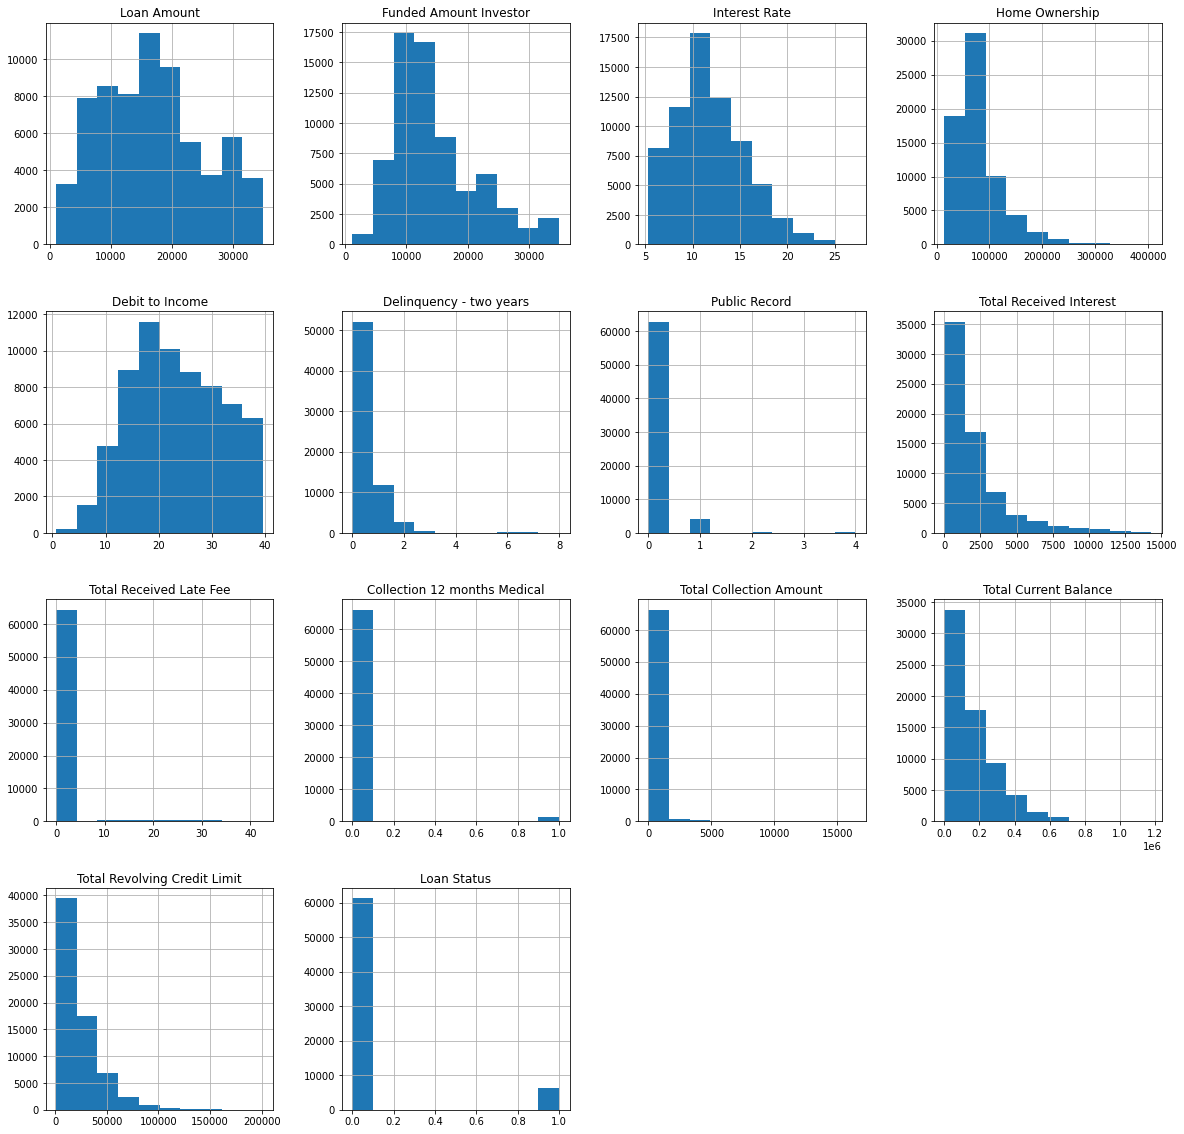

In [99]:
# plot histogram of all numerical columns
data_clean.hist(figsize=(20, 20))

## Interesting findings from the Hists
`Loan Status` has large discrepancy between the two classes. Hence, when training the model, we will try to reduce the number of 0 classifications in order to reduce the bias towards the 0 class.

`Total Current Balance`, `Total Revolving Credit Limit`, `Total Collection Amount`, `Total Received Late Fee` and `Total Receieved Interest` are highly skewed. We will try to reduce the skewness of these variables.

/Users/SPECTRE/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/SPECTRE/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/SPECTRE/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

<AxesSubplot:xlabel='Total Received Interest'>

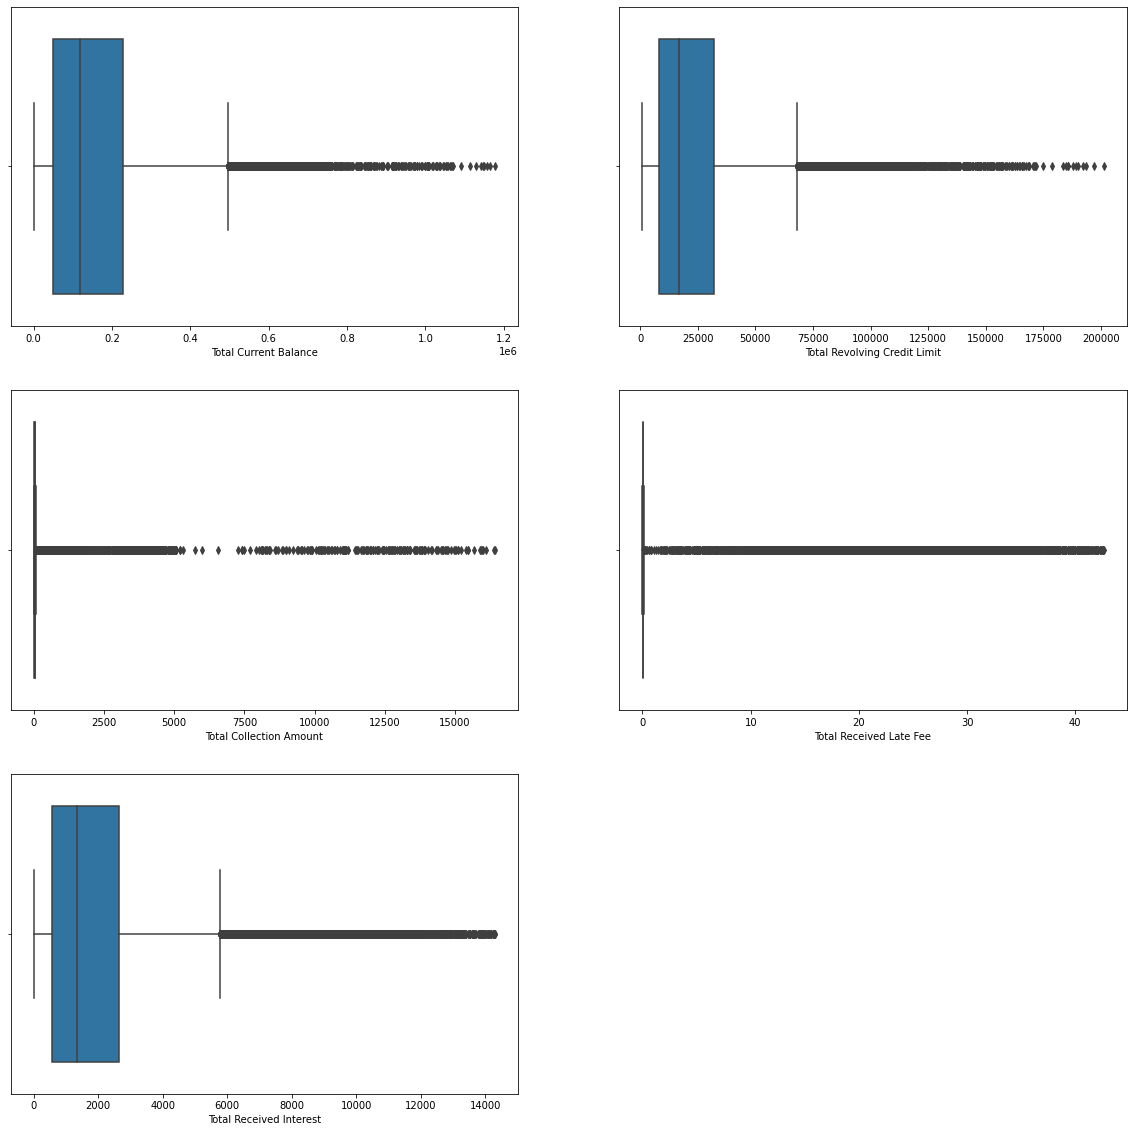

In [107]:
# Box plots of `Total Current Balance`, `Total Revolving Credit Limit`, `Total Collection Amount`, `Total Received Late Fee` and `Total Receieved Interest` using seaborn and subpllots
ax = plt.subplots(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.boxplot(data_clean['Total Current Balance'])

plt.subplot(3, 2, 2)
sns.boxplot(data_clean['Total Revolving Credit Limit'])

plt.subplot(3, 2, 3)
sns.boxplot(data_clean['Total Collection Amount'])

plt.subplot(3, 2, 4)
sns.boxplot(data_clean['Total Received Late Fee'])

plt.subplot(3, 2, 5)
sns.boxplot(data_clean['Total Received Interest'])

## BIVARIATE ANALYSIS

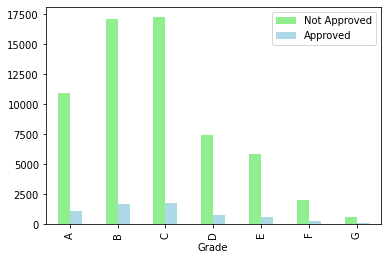

In [109]:
# plot a graph grouping by the grades and sub grades and plotting the count of 0 for each grade and sub grade
data_clean.groupby('Grade')['Loan Status'].value_counts().unstack().plot(kind='bar', color=['lightgreen', 'lightblue'])
# rename legend 0 to not approved and 1 to approved
plt.legend(['Not Approved', 'Approved'])

In [110]:
# get the percentage of 0s and 1s for each grade
data_clean.groupby('Grade')['Loan Status'].value_counts(normalize=True).unstack()

Loan Status,0,1
Grade,,
A,0.908752,0.091248
B,0.912763,0.087237
C,0.906104,0.093896
D,0.903620,0.096380
E,0.904127,0.095873
F,0.896260,0.103740
G,0.893651,0.106349


<AxesSubplot:xlabel='Grade,Loan Status'>

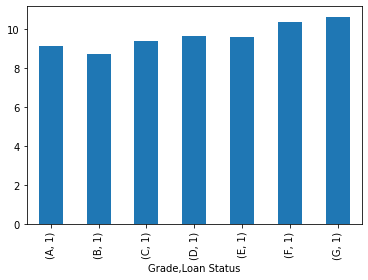

In [111]:
# Groupby grade, count the number of 0s and 1s for each grade and and get the percetage of 1s for each grade
temp = data_clean.groupby('Grade')['Loan Status'].value_counts()
# get the percentages of 1s for each grade
temp = temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# plot all the 1s percentages for each grade    
temp.loc[temp.index.get_level_values(1) == 1].plot(kind='bar')

Text(0.5, 1.0, 'Grade G')

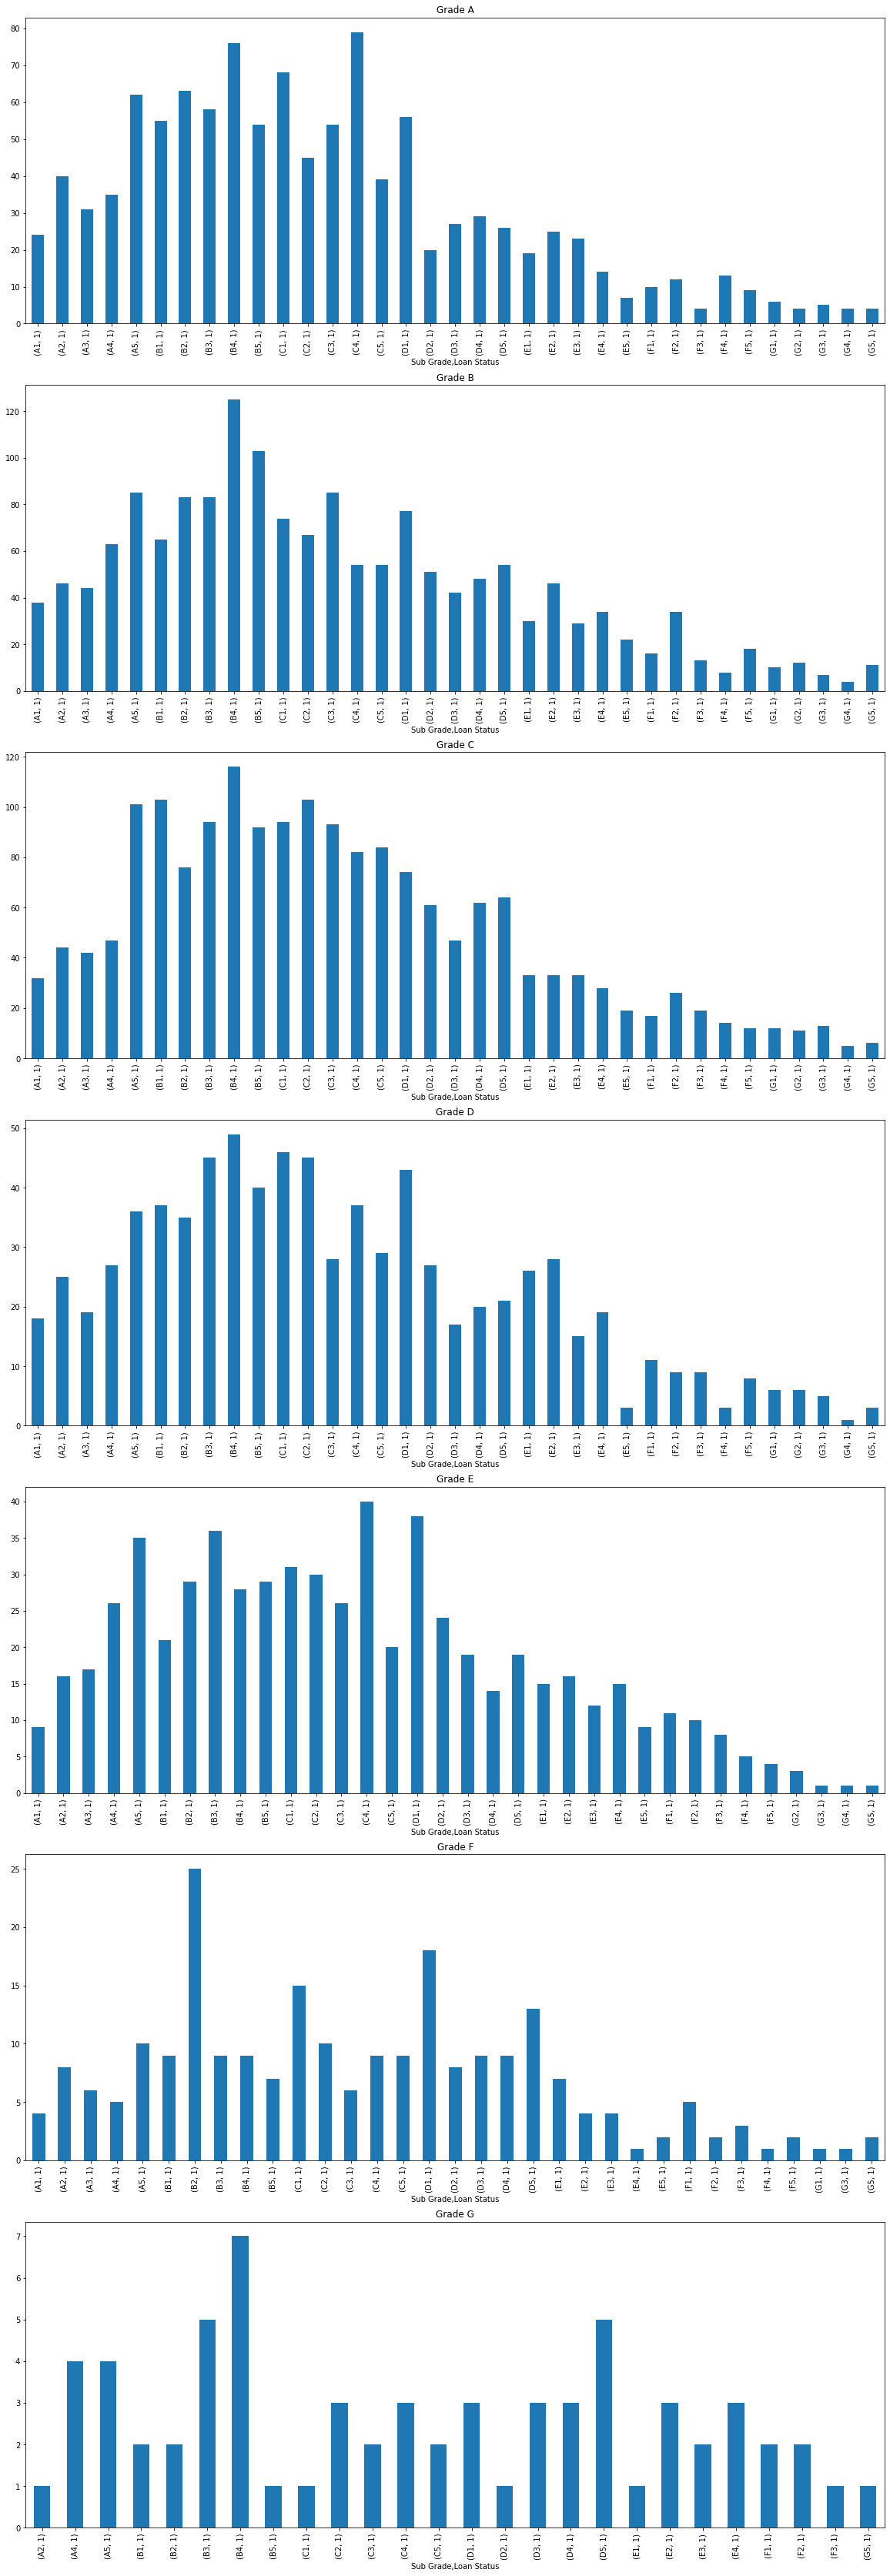

In [112]:
# groupby grade and subgrade
temp = data_clean.groupby(['Grade', 'Sub Grade'])['Loan Status'].value_counts()

# Use subplots and 1 for each grade
ax = plt.subplots(figsize=(20, 60))

plt.subplot(7, 1, 1)
temp.loc['A'].loc[temp.loc['A'].index.get_level_values(1) == 1].plot(kind='bar')
plt.title('Grade A')


plt.subplot(7, 1, 2)
temp.loc['B'].loc[temp.loc['B'].index.get_level_values(1) == 1].plot(kind='bar')
plt.title('Grade B')

plt.subplot(7, 1, 3)
temp.loc['C'].loc[temp.loc['C'].index.get_level_values(1) == 1].plot(kind='bar')
plt.title('Grade C')

plt.subplot(7, 1, 4)
temp.loc['D'].loc[temp.loc['D'].index.get_level_values(1) == 1].plot(kind='bar')
plt.title('Grade D')

plt.subplot(7, 1, 5)
temp.loc['E'].loc[temp.loc['E'].index.get_level_values(1) == 1].plot(kind='bar')
plt.title('Grade E')

plt.subplot(7, 1, 6)
temp.loc['F'].loc[temp.loc['F'].index.get_level_values(1) == 1].plot(kind='bar')
plt.title('Grade F')

plt.subplot(7, 1, 7)
temp.loc['G'].loc[temp.loc['G'].index.get_level_values(1) == 1].plot(kind='bar')
plt.title('Grade G')


<AxesSubplot:xlabel='Application Type'>

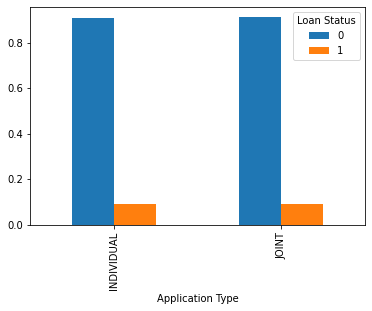

In [113]:
# plot application type vs loan status as percentage of 1s for each application type
data_clean.groupby('Application Type')['Loan Status'].value_counts(normalize=True).unstack().plot(kind='bar')

In [114]:
zeros = data_clean.loc[data_clean["Loan Status"] == 0]
ones =  data_clean.loc[data_clean["Loan Status"] == 1]

balanced = zeros.sample(ones.shape[0])
balanced_df = pd.concat([ones, balanced], axis = 0).reset_index()

Text(0.5, 1.0, 'Delinquency - two years vs Loan Status')

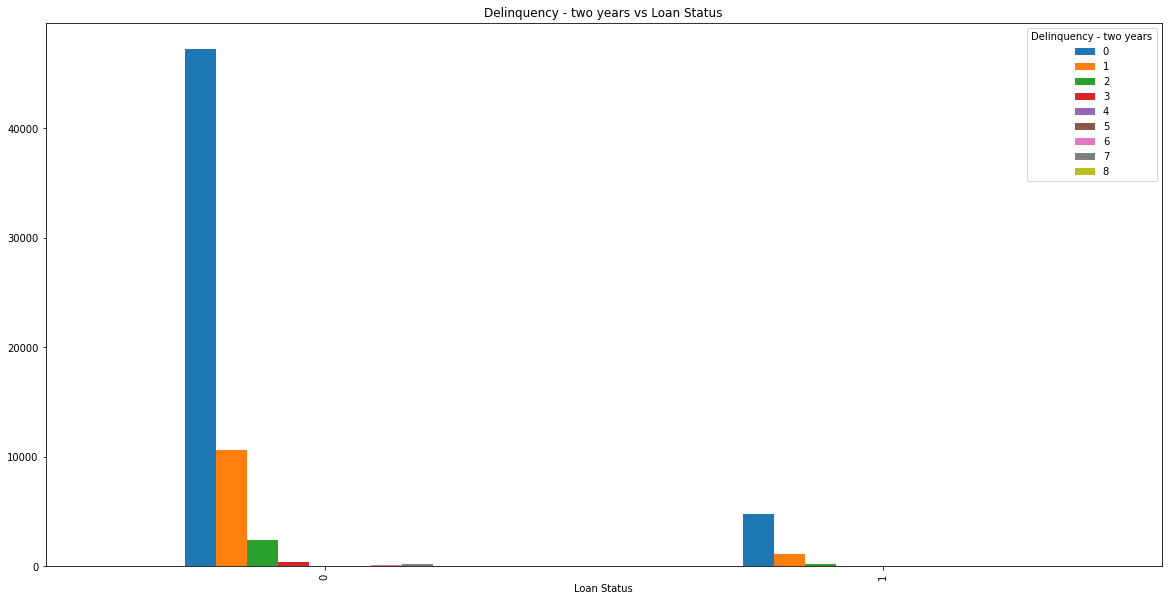

In [115]:
# deliquency 2 years vs loan status , one for 0 loan status and one for 1 loan status
data_clean.groupby('Loan Status')['Delinquency - two years'].value_counts().unstack().plot(kind='bar', figsize=(20, 10))
# title
plt.title('Delinquency - two years vs Loan Status')
# rename the legend name

Text(0.5, 1.0, 'Delinquency - two years vs Loan Status')

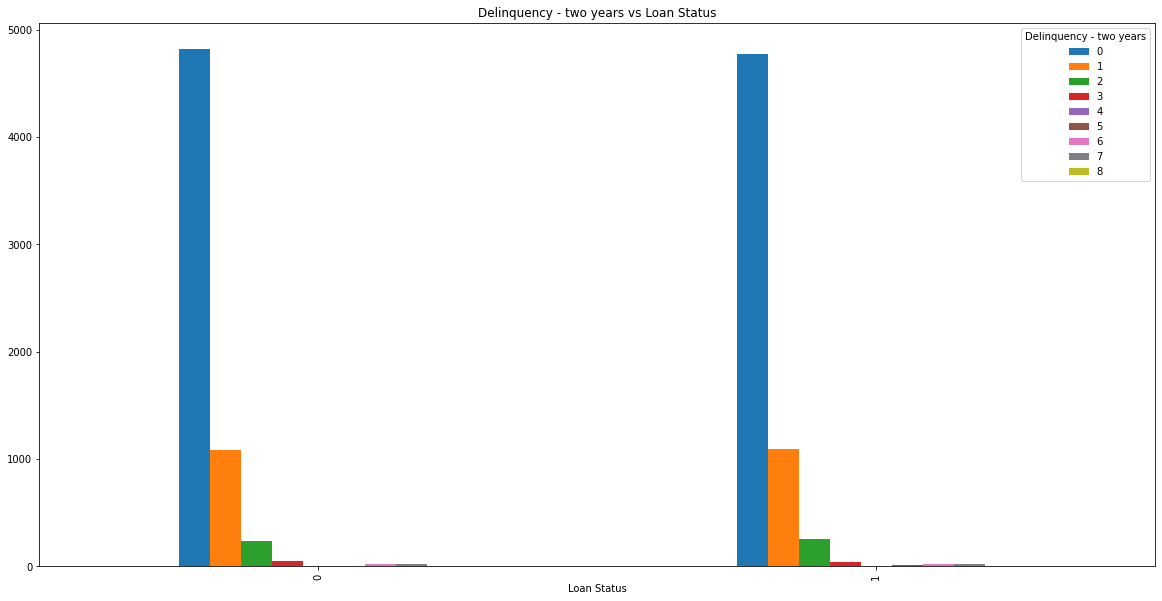

In [116]:
# deliquency 2 years vs loan status , one for 0 loan status and one for 1 loan status
balanced_df.groupby('Loan Status')['Delinquency - two years'].value_counts().unstack().plot(kind='bar', figsize=(20, 10))
# title
plt.title('Delinquency - two years vs Loan Status')
# rename the legend name

In [117]:
data_clean[data_clean['Loan Status'] == 0].groupby('Delinquency - two years')['Loan Status'].value_counts()/data_clean[data_clean['Loan Status'] == 0].shape[0]

Delinquency - two years  Loan Status
0                        0              0.772222
1                        0              0.173859
2                        0              0.039136
3                        0              0.006550
4                        0              0.000212
5                        0              0.001062
6                        0              0.002679
7                        0              0.003675
8                        0              0.000604
Name: Loan Status, dtype: float64

In [118]:
data_clean[data_clean['Loan Status'] == 1].groupby('Delinquency - two years')['Loan Status'].value_counts()/data_clean[data_clean['Loan Status'] == 1].shape[0]

Delinquency - two years  Loan Status
0                        1              0.765422
1                        1              0.174972
2                        1              0.040859
3                        1              0.007050
4                        1              0.000481
5                        1              0.001442
6                        1              0.004326
7                        1              0.004326
8                        1              0.001122
Name: Loan Status, dtype: float64

In [119]:
# deliquency 2 years vs loan status , one for 0 loan status and one for 1 loan status percentage
temp = data_clean.groupby('Loan Status')['Delinquency - two years'].value_counts(normalize=True).unstack()
# at a row which is the diff
temp.loc["Diff Approved vs Not Approved"] = temp.loc[1] - temp.loc[0]
temp

Delinquency - two years,0,1,2,3,4,5,6,7,8
Loan Status,,,,,,,,,
0,0.772222,0.173859,0.039136,0.00655,0.000212,0.001062,0.002679,0.003675,0.000604
1,0.765422,0.174972,0.040859,0.00705,0.000481,0.001442,0.004326,0.004326,0.001122
Diff Approved vs Not Approved,-0.006800,0.001113,0.001723,0.00050,0.000268,0.000380,0.001647,0.000651,0.000517


Text(0, 0.5, 'Total Collection Amount')

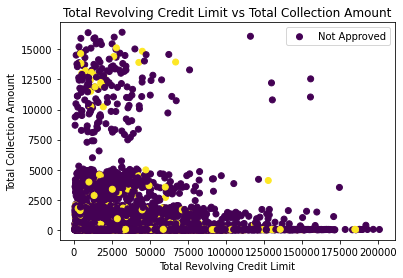

In [120]:
# plot scatter of Total Revolving Credit Limit vs Total Collection Amount and color the points by loan status
plt.scatter(data_clean['Total Revolving Credit Limit'], data_clean['Total Collection Amount'], c=data_clean['Loan Status'])
# title
plt.title('Total Revolving Credit Limit vs Total Collection Amount')
# legend
plt.legend(['Not Approved', 'Approved'])
# qxis labels
plt.xlabel('Total Revolving Credit Limit')
plt.ylabel('Total Collection Amount')

Text(0, 0.5, 'Total Collection Amount')

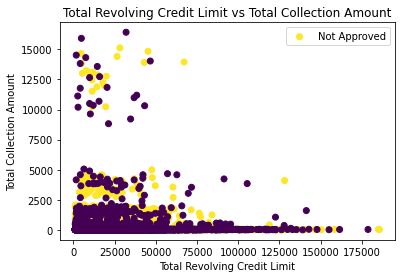

In [121]:
# plot scatter of Total Revolving Credit Limit vs Total Collection Amount and color the points by loan status
plt.scatter(balanced_df['Total Revolving Credit Limit'], balanced_df['Total Collection Amount'], c=balanced_df['Loan Status'])
# title
plt.title('Total Revolving Credit Limit vs Total Collection Amount')
# legend
plt.legend(['Not Approved', 'Approved'])
# qxis labels
plt.xlabel('Total Revolving Credit Limit')
plt.ylabel('Total Collection Amount')

<AxesSubplot:xlabel='Loan Status'>

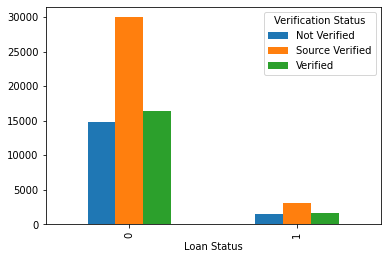

In [122]:
# Verification Statues vs loan status
data_clean.groupby('Loan Status')['Verification Status'].value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='Loan Status'>

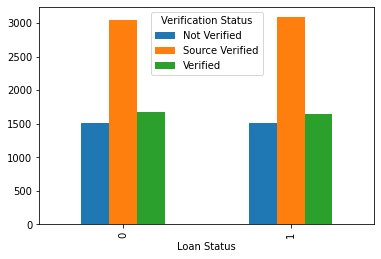

In [123]:
# Verification Statues vs loan status
balanced_df.groupby('Loan Status')['Verification Status'].value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='Loan Status'>

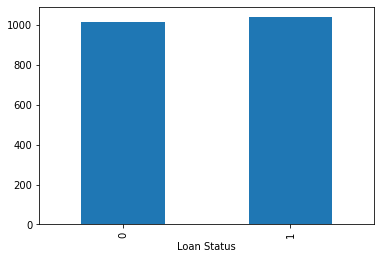

In [124]:
# Loan Amount vs loan status
data_clean.groupby('Loan Status')['Loan Amount'].min().plot(kind='bar')

# BASELINE MODEL

### Models evaluated

For the baseline model we are using Logistic Classification, K-means classification, Decision tree Classifier, Random Forest Classifier. 
The features we use are : *insert an image of features*
We choose to evaluate these models using F-1 score because this dataset has imbbalanced classes. It combines precision and recall into a single score hence balancing both measures. 
We perform basic one hot encoding on the categorical features and leave all other features as it is. 

Logistic Regression
This assumes linear relationship between the features and the label (loan status). The f-1 score for this model is 0. This means that the model is not useful and performs badly

Decision tree Classifier 
this model is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. They break down complex data into more manageable parts. Decison trees can automatically handle missing values, can be used to capture non-linear relationships, and are used for both numerical and catagorical data. After testing this model against our unbalanced dataset we get a f-1 score of 0.015 which is better than Logistic Regression. 

Random Forest Classifier 
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. It does sometimes tend to overfit the data but there are ways we can optimize it and prevent from overfitting. The f-1 score for this model on our unbalanced dataset is 0.13.

The baseline models are fitted on the same trainings set.All hyperparametrs are default to test the basic model performance. 

### Result
From analysisng the models above, we choose to further work on Decision trees and Random Forest Classifiers. We aim to perform feauture engineering, choose the optimum hyperparameters, and other optimization of model to select our final model. 


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV

In [125]:
X = data_clean.drop('Loan Status', axis=1)
y = data_clean['Loan Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
preproc = ColumnTransformer([
    ("one-hot", OneHotEncoder(handle_unknown="ignore"), ["Grade", "Sub Grade", "Employment Duration", "Verification Status", "Application Type"])
], remainder="passthrough")

In [130]:
rf = RandomForestClassifier() #Random Forest Classifier
log = LogisticRegression() #Logistic Regression
dt = DecisionTreeClassifier() #Decision Tree Classifier

for i in range(3):
    if i == 0:
        model = rf
    elif i == 1:
        model = log
    elif i == 2:
        model = dt

    pipe = Pipeline([
        ("preprocessing", preproc),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print("Model: ", model)
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Class 0:", (y_pred == 0).sum())
    print("Class 1:", (y_pred == 1).sum())
    print("")

Model:  RandomForestClassifier()
Accuracy Score:  0.9097309716149115
F1 Score:  0.0
Class 0: 13493
Class 1: 0

Model:  LogisticRegression()
Accuracy Score:  0.9097309716149115
F1 Score:  0.0
Class 0: 13493
Class 1: 0

Model:  DecisionTreeClassifier()
Accuracy Score:  0.8205736307715111
F1 Score:  0.10033444816053513
Class 0: 12020
Class 1: 1473



# FEATURE ENGINEERING

OneHotEncoding - One-hot encoding in machine learning is the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy. We are one hot encoding the catagorical features "Employment Duration", "Verification Status", "Application Type", "Delinquency - two years", "Collection 12 months Medical". Because these features are not in any specific order or cannot be classified as ordinal, we are choosing it over other encoding methods. 

Ordinal Encoding - We are combining teh columns Grade and Sub Grade to make a new column called GradeSubGrade. Since these grade catagories are ordinal, we prefer ordinal encoding over OneHotEncoding or any other encoding methods. For example, the grade AF1 is worse than grade AA1. This also makes the model more efficient by reducing the memory (number of columns in onehotencoding) and increasing the speed. 

Since this dataset in highly unbalanced, we decide to balance the dataset by undersampling. Since in real world we the loan status is not equally likely to be defaulted, we try to keep the perecntage divide unequal yet close. We run a test and choose the most optimal balanced set.

### Combining grade and subgrade and ordinally encoding it

In [132]:
data = pd.read_csv("/Users/SPECTRE/Downloads/archive-3/train.csv")
train = drop_useless(data)

grade = train["Grade"].unique()
subgrade = train["Sub Grade"].unique()
train["GradeSubGrade"] = train["Grade"] + train["Sub Grade"]
train = train.drop(columns= ["Grade", "Sub Grade"])

In [133]:
features = []

for i in grade:
    for j in subgrade:
        lst = [i+j]
        features.append(lst)
features = np.unique(features)

dicta = {}
k = 1
for i in features:
    dicta[i] = k
    k = k+1
dicta

train["GradeSubGrade"] = train["GradeSubGrade"].replace(dicta)

In [134]:
train.head()

,Loan Amount,Funded Amount Investor,Interest Rate,Employment Duration,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,Public Record,Total Received Interest,Total Received Late Fee,Collection 12 months Medical,Application Type,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,GradeSubGrade
0,10000,12329.36286,11.135007,MORTGAGE,176346.62670,Not Verified,16.284758,1,0,2929.646315,0.102055,0,INDIVIDUAL,31,311301,6619,0,49
1,3609,12191.99692,12.237563,RENT,39833.92100,Source Verified,15.412409,0,0,772.769385,0.036181,0,INDIVIDUAL,53,182610,20885,0,88
2,28276,21603.22455,12.545884,MORTGAGE,91506.69105,Source Verified,28.137619,0,0,863.324396,18.778660,0,INDIVIDUAL,34,89801,26155,0,194
3,11170,17877.15585,16.731201,MORTGAGE,108286.57590,Source Verified,18.043730,1,0,288.173196,0.044131,0,INDIVIDUAL,40,9189,60214,0,83
4,16890,13539.92667,15.008300,MORTGAGE,44234.82545,Source Verified,17.209886,1,1,129.239553,19.306646,0,INDIVIDUAL,430,126029,22579,0,89


### BALANCING THE DATASET

In [137]:
zeros = train.loc[train["Loan Status"] == 0]
ones =  train.loc[train["Loan Status"] == 1]

balanced = zeros.sample(ones.shape[0])
balanced_df = pd.concat([ones, balanced], axis = 0).reset_index()
balanced_df = balanced_df.drop(columns = ["index"])



### Feature Engineering via sklearN

In [140]:
preproc = ColumnTransformer([
    ("one-hot", OneHotEncoder(handle_unknown="ignore"), ["Employment Duration", "Verification Status", "Application Type"]),
    ("Std-scale", StandardScaler(), ['Total Collection Amount', 'Total Received Late Fee'])
], remainder="passthrough")

### Random Forest Classifier

In [142]:
X = balanced_df.drop('Loan Status', axis=1)
y = balanced_df['Loan Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_pipe = Pipeline([
    ("preprocessing", preproc),
    ("rf", rf)
])

param_grid = {'rf__n_estimators' : [10, 30, 50, 75, 100],
              'rf__max_depth' : [2, 5, 10, 20, None],
              'rf__min_samples_split' : [1, 2, 5, 10],
              'rf__class_weight' : ["balanced", "balanced_subsample", None]}

grid_search_rf = GridSearchCV(rf_pipe, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


Unable to load extension: pydevd_plugins.extensions.types.pydevd_plugin_pandas_types
Unable to load extension: pydevd_plugins.extensions.types.pydevd_plugin_pandas_types
Unable to load extension: pydevd_plugins.extensions.types.pydevd_plugin_pandas_types
Unable to load extension: pydevd_plugins.extensions.types.pydevd_plugin_pandas_types
Unable to load extension: pydevd_plugins.extensions.types.pydevd_plugin_pandas_types
Unable to load extension: pydevd_plugins.extensions.types.pydevd_plugin_pandas_types
Unable to load extension: pydevd_plugins.extensions.types.pydevd_plugin_pandas_types
Unable to load extension: pydevd_plugins.extensions.types.pydevd_plugin_pandas_types
/Users/SPECTRE/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
375 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by se

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one-hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Employment '
                                                                          'Duration',
                                                                          'Verification '
                                                                          'Status',
                                                                          'Application '
                                                                          'Type']),
                                                                        ('Std-scale',
                                     

In [143]:
grid_search_rf.best_params_

{'rf__class_weight': 'balanced',
 'rf__max_depth': 2,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 30}

In [144]:
grid_search_rf.best_score_

0.5191041701889237

In [145]:
# get accuracy
grid_search_rf.score(X_test, y_test)
accuracy_score(y_test, grid_search_rf.predict(X_test))

0.5282338806567881

In [146]:
dt_pipe = Pipeline([
    ("preprocessing", preproc),
    ("dt", dt)
])

param_grid = {'dt__max_depth' : [2, 5, 10, 20, None],
                'dt__min_samples_split' : [1, 2, 5, 10],
                'dt__class_weight' : ["balanced", None]}

grid_search_dt = GridSearchCV(dt_pipe, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/Users/SPECTRE/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/SPECTRE/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/SPECTRE/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/SPECTRE/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one-hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Employment '
                                                                          'Duration',
                                                                          'Verification '
                                                                          'Status',
                                                                          'Application '
                                                                          'Type']),
                                                                        ('Std-scale',
                                     

In [147]:
grid_search_dt.best_params_

{'dt__class_weight': 'balanced',
 'dt__max_depth': 2,
 'dt__min_samples_split': 2}

In [148]:
grid_search_dt.best_score_

0.5801652170704724

In [149]:
# get accuracy score of the best model
y_pred = grid_search_rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5282338806567881

In [150]:
# get recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.46280344557556774

In [151]:
# get precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.5457063711911357

In [152]:
# get AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5297623785254888

In [153]:
# export the dt model
import pickle
pickle.dump(grid_search_dt, open('dt_model.pkl', 'wb'))

# FINAL MODEL - DECISION TREE CLASSIFIER

In [160]:
final_pipe = Pipeline([
    ("preprocessing", preproc),
    ("dt", DecisionTreeClassifier(max_depth = 2, min_samples_split = 2, class_weight = "balanced"))
])

final_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Employment Duration',
                                                   'Verification Status',
                                                   'Application Type']),
                                                 ('Std-scale', StandardScaler(),
                                                  ['Total Collection Amount',
                                                   'Total Received Late '
                                                   'Fee'])])),
                ('dt',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=2))])

In [163]:
f1_score(y_test, final_pipe.predict(X_test))

0.6049868766404198

In [171]:
tn, fp, fn, tp = confusion_matrix(y_test, final_pipe.predict(X_test)).ravel()
print("True negative ", tn)
print("True positive ", tp)
print("False negative ", fn)
print("False positive ", fp)

True negative  371
True positive  922
False negative  355
False positive  849


## The final model is a decsion tree classifier with f1 score of 0.60.